### Question 1: Pearson correlation coefficient is a measure of the linear relationship between two variables. Suppose you have collected data on the amount of time students spend studying for an exam and their final exam scores. Calculate the Pearson correlation coefficient between these two variables and interpret the result.

To calculate the Pearson correlation coefficient between two variables, we need to compute the covariance and the standard deviation of each variable, and then use the formula:

r = cov(X, Y) / (std(X) * std(Y))

where X and Y are the two variables of interest.

Below is example code in python to calculate correlation between time spent studying and Final Exam Score

In [3]:
# Generate synthetic dataset
import numpy as np
import pandas as pd

# Keep random seed for reproducibility
np.random.seed(546)

n = 1000
time_studied = np.random.normal(loc=8, scale=2, size=n)
score = (time_studied**2)-3*time_studied + 2 + np.random.normal(loc=0, scale=5, size=n)

# Create dataframe
df = pd.DataFrame({'time_studied':time_studied,
                   'score':score})
df.head()

,time_studied,score
0,7.868923,46.840619
1,8.809851,49.642020
2,10.105442,81.231590
3,7.979870,46.678259
4,13.396276,139.275551


In [4]:
cor = df.corr()
cor

,time_studied,score
time_studied,1.000000,0.960164
score,0.960164,1.000000


<AxesSubplot:title={'center':'Time studied vs Score'}, xlabel='time_studied', ylabel='score'>

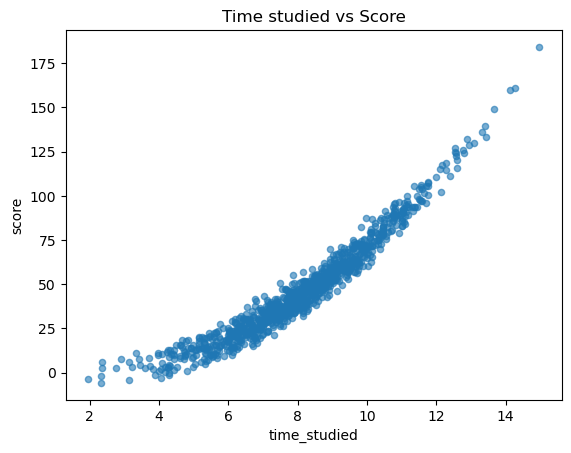

In [6]:
df.plot(kind='scatter',x='time_studied',y='score',title = 'Time studied vs Score',alpha=0.6)

Positive Correlation found between time studied and Final Score

### Question 2 : Spearman's rank correlation is a measure of the monotonic relationship between two variables. Suppose you have collected data on the amount of sleep individuals get each night and their overall job satisfaction level on a scale of 1 to 10. Calculate the Spearman's rank correlation between these two variables and interpret the result.

To calculate the Spearman's rank correlation, you need to rank both variables separately, and then calculate the correlation between their ranks. Here's an example of how to do this with the sleep and job satisfaction data:

| Sleep | Job Satisfaction |
|:-:|:-:|
|8|9|
|7|6|
|6|4|
|5|7|
|8|8|
|7|5|
|6|3|
|5|6|
|4|2|
|7|7|

Formula for Spearmans Correlation :

$\rho=1-\frac{6 \sum d_{i}^{2}}{n (n^{2}-1)}$

Where:

$\rho$ is the Spearman's correlation coefficient

$d_{i}$ is the difference between the ranks of the corresponding values of the two variables

${n}$ is the number of observations (or pairs of data points) in the dataset.

This formula calculates the degree of association between the two variables based on their ranks rather than their actual values. The ranks are assigned based on the order in which the values appear in the dataset, with ties being assigned an average rank.

Creating Above data in python :

In [8]:
import pandas as pd
dct = {
    'sleep': [8,7,6,5,8,7,6,5,4,7],
    'Job Satisfaction' : [9,6,4,7,8,5,3,6,2,7]
}
df = pd.DataFrame(dct)
df

,sleep,Job Satisfaction
0,8,9
1,7,6
2,6,4
3,5,7
4,8,8
5,7,5
6,6,3
7,5,6
8,4,2
9,7,7


In [9]:
df.rank()

,sleep,Job Satisfaction
0,9.5,10.0
1,7.0,5.5
2,4.5,3.0
3,2.5,7.5
4,9.5,9.0
5,7.0,4.0
6,4.5,2.0
7,2.5,5.5
8,1.0,1.0
9,7.0,7.5


In [10]:
df.rank().corr()

,sleep,Job Satisfaction
sleep,1.000000,0.660516
Job Satisfaction,0.660516,1.000000


In [11]:
df.corr(method='spearman')

,sleep,Job Satisfaction
sleep,1.000000,0.660516
Job Satisfaction,0.660516,1.000000


A Spearman's correlation coefficient of 0.66 indicates a moderately strong positive correlation between two variables. The range of Spearman's correlation coefficient is from -1 to +1, where -1 represents a perfectly negative correlation, 0 represents no correlation, and +1 represents a perfectly positive correlation.

In the case of a Spearman's correlation coefficient of 0.66, the two variables being compared have a strong tendency to move together in the same direction. However, the relationship may not be perfect, and there may be some variation or noise in the data.

### Question 3 : Suppose you are conducting a study to examine the relationship between the number of hours of exercise per week and body mass index (BMI) in a sample of adults. You collected data on both variables for 50 participants. Calculate the Pearson correlation coefficient and the Spearman's rank correlation between these two variables and compare the results.

Below is sample data generated for 50 datapoints in python between exercise hours amd BMI

In [13]:
import pandas as pd
import numpy as np

# Set Random seed
np.random.seed(735)

# Generate Sample Data
n = 50
exercise_hours = np.random.normal(loc=5 , scale=1.5, size=n)
BMI = 125/exercise_hours + np.random.normal(loc=0, scale=5, size=n)

# Generate Dataframe
df = pd.DataFrame({'exercise_hours':exercise_hours,
                   'BMI':BMI})
df.head()

,exercise_hours,BMI
0,4.878720,26.307417
1,7.800812,10.437406
2,7.868636,27.306531
3,4.255960,23.121092
4,4.276953,23.696758


Pearson's Correlation

In [14]:
pearson_corr = df.corr(method='pearson')
pearson_corr

,exercise_hours,BMI
exercise_hours,1.000000,-0.803842
BMI,-0.803842,1.000000


Spearmans Correlation

In [15]:
spearman_corr = df.corr(method='spearman')
spearman_corr

,exercise_hours,BMI
exercise_hours,1.00000,-0.79976
BMI,-0.79976,1.00000


Both Spearman's Correlation and Pearson's Correlation show's strong negative Correlation between BMI and exercise time

<AxesSubplot:title={'center':'BMI vs Exercise Hours'}, xlabel='exercise_hours', ylabel='BMI'>

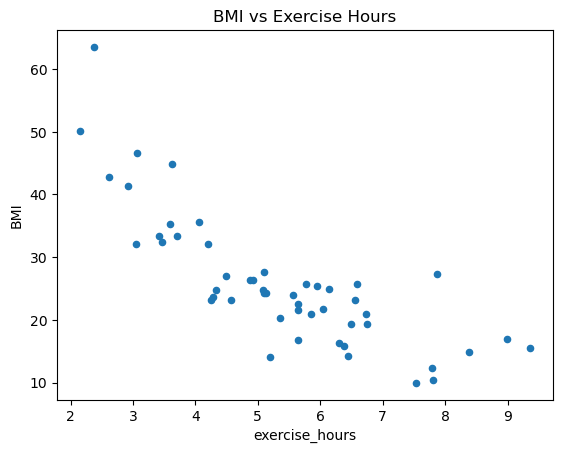

In [16]:
df.plot(kind='scatter',x='exercise_hours',y='BMI',title='BMI vs Exercise Hours')

<AxesSubplot:xlabel='exercise_hours', ylabel='BMI'>

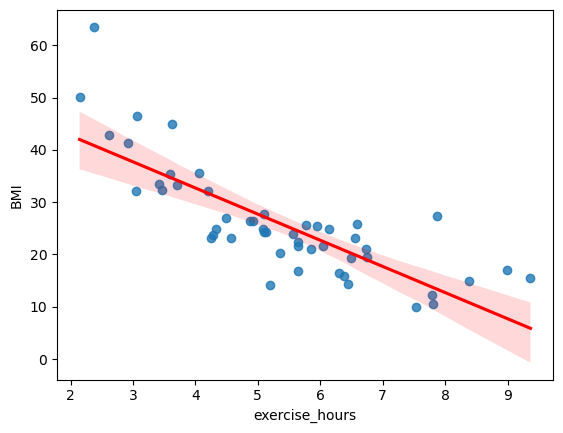

In [17]:
import seaborn as sns
sns.regplot(data=df,x='exercise_hours',y='BMI',line_kws={"color": "red"},ci=95)

### Question 4 : A researcher is interested in examining the relationship between the number of hours individuals spend watching television per day and their level of physical activity. The researcher collected data on both variables from a sample of 50 participants. Calculate the Pearson correlation coefficient between these two variables.

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Set the random seed for reproducibility
np.random.seed(123)

# Generate synthetic data for hours of TV watching and physical activity
tv_hours = np.random.normal(3, 1, 50)
physical_activity = 15/tv_hours + np.random.normal(0,1,50)

# Showing Dataframe
df = pd.DataFrame({'tv_hours':tv_hours,'physical_activity':physical_activity})
print(df.head())

print('\n===========================================================\n')

# Compute the Pearson correlation coefficient and p-value
corr, pval = pearsonr(tv_hours, physical_activity)

# Print the results
print("Pearson correlation coefficient:", corr)
print("p-value:", pval)

   tv_hours  physical_activity
0  1.914369           6.541393
1  3.997345           2.713702
2  3.282978           6.312734
3  1.493705           9.244079
4  2.421400           6.224447


Pearson correlation coefficient: -0.5795118368116693
p-value: 1.034768788040542e-05


Moderate Negative Correlation found between tv_hours and phyiscal_activity

Note that the pearsonr() function returns two values: the Pearson correlation coefficient and the corresponding p-value. The p-value is a measure of the strength of evidence against the null hypothesis of no correlation, and a p-value less than 0.05 is generally considered to be statistically significant.

<AxesSubplot:xlabel='tv_hours', ylabel='physical_activity'>

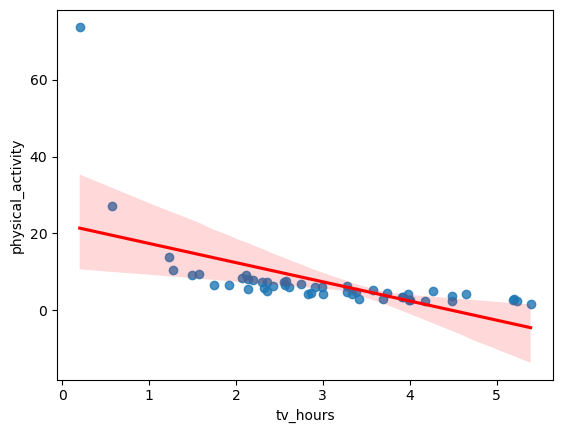

In [19]:
import seaborn as sns
sns.regplot(data=df,x='tv_hours',y='physical_activity',line_kws={'color':'red'},ci=95)

### Question 5 : A survey was conducted to examine the relationship between age and preference for a particular brand of soft drink. The survey results are shown below:
| Age(Years) | Soft Drink Preference |
|:-:|:-:|
25 | Coke
42 | Pepsi
37 | Mountain Dew
19 | Coke
31 | Pepsi
28 | Coke

To check if there is significant relationship between continuous and categorical variables ANOVA can be used

In [20]:
import pandas as pd
data = {'Age': [25, 42, 37, 19, 31, 28],
        'Soft Drink Preference': ['Coke', 'Pepsi', 'Mountain Dew', 'Coke', 'Pepsi', 'Coke']}
df = pd.DataFrame(data)
df

,Age,Soft Drink Preference
0,25,Coke
1,42,Pepsi
2,37,Mountain Dew
3,19,Coke
4,31,Pepsi
5,28,Coke


In [21]:
# Perform f oneway test
from scipy.stats import f_oneway
coke = df[df['Soft Drink Preference'] == 'Coke']['Age']
pepsi = df[df['Soft Drink Preference'] == 'Pepsi']['Age']
mountain_dew = df[df['Soft Drink Preference'] == 'Mountain Dew']['Age']

f_statistic, p_value = f_oneway(coke, pepsi, mountain_dew)
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 3.524390243902438
p-value: 0.1631217391539759


In [22]:
# Assuming alpha value of 0.05 
alpha = 0.05
if p_value < alpha:
    print('Reject the Null Hypothesis')
    print('Conclusion : Age and Soft Drink Preference are DEPENDENT of each other')
else:
    print('FAIL to reject the Null Hypothesis')
    print('Conclusion : Age and Soft Drink Preference are INDEPENDENT of each other')

FAIL to reject the Null Hypothesis
Conclusion : Age and Soft Drink Preference are INDEPENDENT of each other


<AxesSubplot:xlabel='Soft Drink Preference', ylabel='Age'>

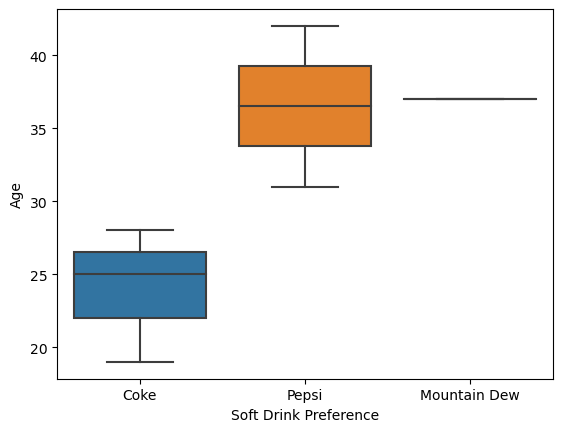

In [23]:
import seaborn as sns
sns.boxplot(data=df,x='Soft Drink Preference',y='Age')

### Question 6 : A company is interested in examining the relationship between the number of sales calls made per day and the number of sales made per week. The company collected data on both variables from a sample of 30 sales representatives. Calculate the Pearson correlation coefficient between these two variables

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Generate synthetic data
np.random.seed(1234)  # for reproducibility
sales_calls = np.random.randint(50, 100, size=30)
sales_per_week = np.round(sales_calls * np.random.uniform(0.05, 0.2, size=30), decimals=0)

# Create dataframe for printing
df = pd.DataFrame({'sales_calls':sales_calls,'sales_per_week':sales_per_week})
print(df.head())

print('\n==============================================\n')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(sales_calls, sales_per_week)

print("Pearson correlation coefficient: {:.2f}".format(corr_coef))
print("p-value: {:.2f}".format(p_value))

   sales_calls  sales_per_week
0           97            18.0
1           69            14.0
2           88             6.0
3           62             7.0
4           74             9.0


Pearson correlation coefficient: 0.53
p-value: 0.00


Pearson correlation of 0.53 shows moderately positive correlation between sales call per week and sales per week

<AxesSubplot:xlabel='sales_calls', ylabel='sales_per_week'>

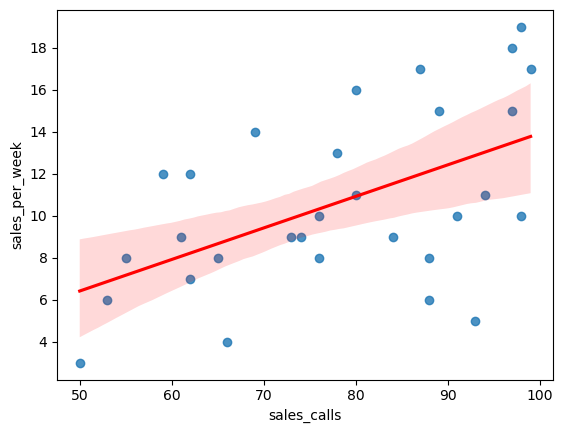

In [25]:
import seaborn as sns
sns.regplot(data=df, x = 'sales_calls', y='sales_per_week',line_kws={'color':'red'},ci=95)